# KNN Project Exercise - Solutions

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\data\sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [6]:
df.isnull().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [7]:
df.duplicated(subset=None).sum()

0

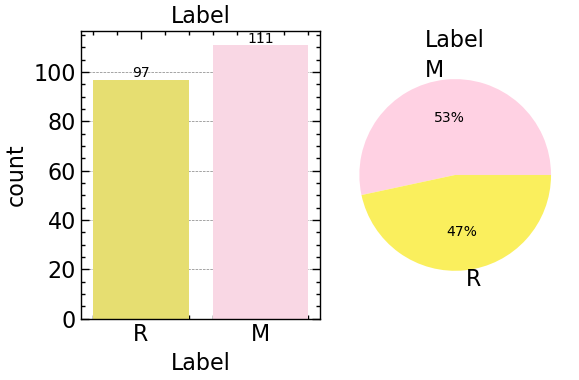

In [8]:
plt.style.use(['science','notebook','grid'])

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
atribute = 'Label'
ax = sns.countplot(x=atribute , data= df, palette=['#FAEF5D','#FFD1E3'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x =p.get_x() + p.get_width()/2, 
            y = height + 1,
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title(atribute);

# pie chart
plt.subplot(1,2,2)
counts = df[atribute].value_counts()
colors = sns.color_palette(['#FFD1E3', '#FAEF5D'])
plt.pie(counts, labels = counts.index, colors=colors, autopct='%0.0f%%')
plt.title(atribute)

plt.tight_layout()
plt.show()

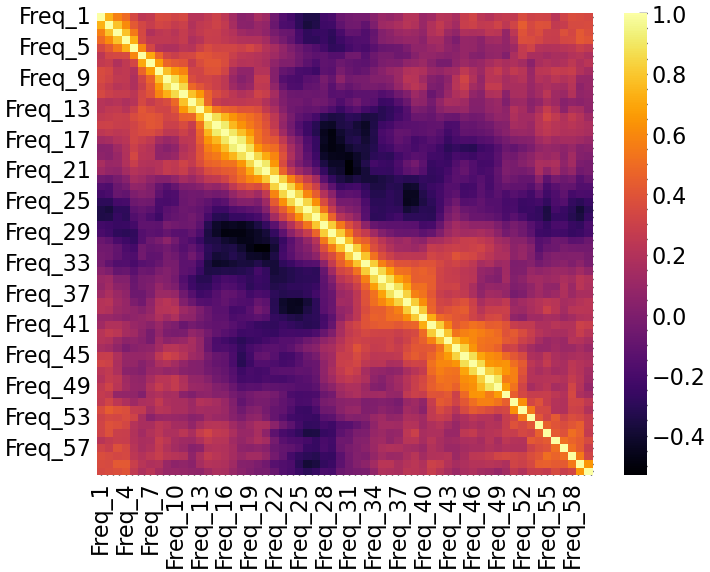

In [9]:
sns.heatmap(df.corr(), cmap='inferno');

# Create X and y

In [10]:
X = df.drop('Label', axis =1)
y = df['Label']

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [12]:
lb = LabelBinarizer()

In [13]:
y = lb.fit_transform(y).ravel()

In [14]:
lb.classes_

array(['M', 'R'], dtype='<U1')

## Train Test Split | Scale Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.15, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [18]:
scaler = StandardScaler()

In [19]:
knn = KNeighborsClassifier()

In [20]:
operation = [('scaler',scaler),('knn', knn)]

## Pipeline

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline(operation)

## Hyperparamter Tuning GridSearchCV

In [23]:
k_values = list(range(1, 30))

In [24]:
param_grid = {'knn__n_neighbors':k_values}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
model_grid = GridSearchCV(pipe, param_grid, cv = 5, scoring='accuracy')

In [27]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [28]:
model_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [29]:
model_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
model_grid.cv_results_['mean_test_score']

array([0.85793651, 0.80650794, 0.79492063, 0.77206349, 0.80047619,
       0.74365079, 0.76095238, 0.72666667, 0.73793651, 0.71539683,
       0.73253968, 0.69825397, 0.70380952, 0.70396825, 0.73238095,
       0.71555556, 0.72698413, 0.70412698, 0.69301587, 0.69857143,
       0.71      , 0.69285714, 0.69301587, 0.69301587, 0.69888889,
       0.68746032, 0.69873016, 0.68730159, 0.69857143])

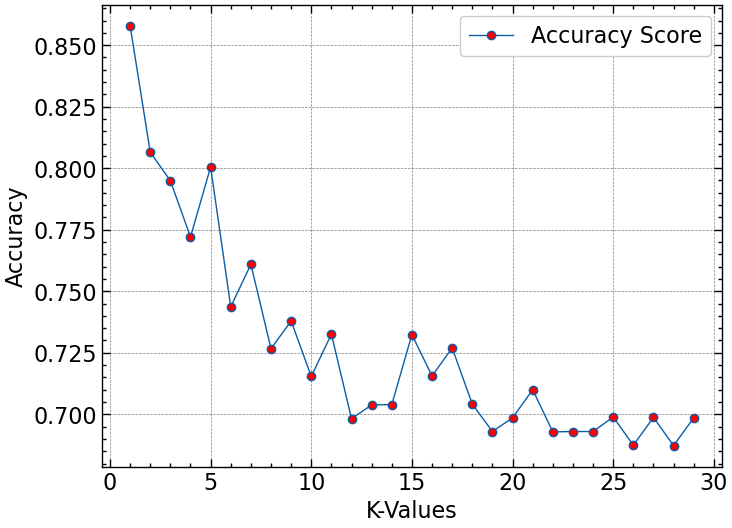

In [31]:
score = model_grid.cv_results_['mean_test_score']
plt.plot(range(1, 30), score, 'o-', markerfacecolor='red', lw=1, label='Accuracy Score')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.legend();

## Final Model Evaluation

In [32]:
preds = model_grid.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [34]:
confusion_matrix(y_test, preds)

array([[18,  1],
       [ 1, 12]], dtype=int64)

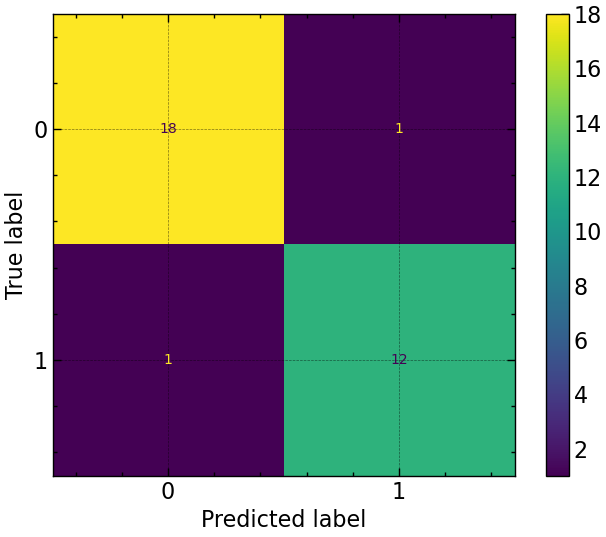

In [35]:
ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test);

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [37]:
accuracy_score(y_test,preds)

0.9375

## Performance Curve

In [41]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

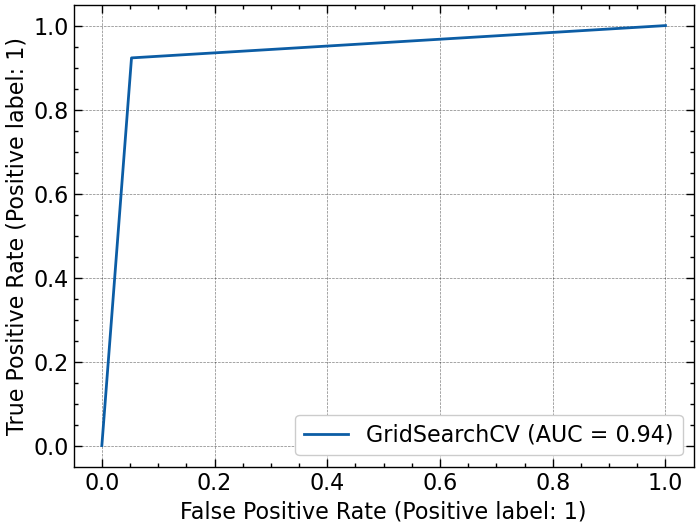

In [42]:
RocCurveDisplay.from_estimator(model_grid, X_test, y_test);

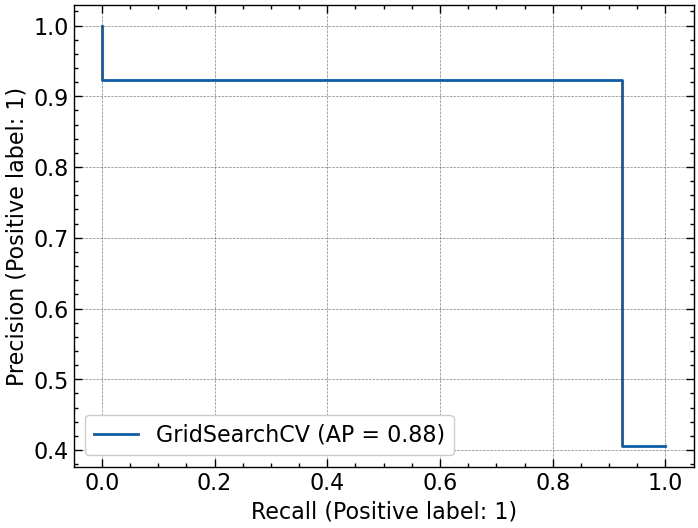

In [44]:
PrecisionRecallDisplay.from_estimator(model_grid, X_test, y_test);